In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude

from citipy import citipy

In [5]:
#Create a list for holding te cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the requests library.
import requests

# Import the API key. 
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e6131d65f75d8517a621094a6beff85


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
#city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | mont-dore
Processing Record 3 of Set 1 | thinadhoo
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | slave lake
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | ambon
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | naze
Processing Record 22 of Set 1 | kalmunai
Processing Record 23 of Set 1 | alyang

Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | hammerfest
Processing Record 40 of Set 4 | pacific grove
Processing Record 41 of Set 4 | canapi
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | puerto ayora
Processing Record 44 of Set 4 | grimshaw
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | shitkino
Processing Record 47 of Set 4 | mandalay
Processing Record 48 of Set 4 | miraflores
Processing Record 49 of Set 4 | raahe
Processing Record 50 of Set 4 | zaraza
Processing Record 1 of Set 5 | yatou
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | jining
Processing Record 4 of Set 5 | kaeo
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of

Processing Record 30 of Set 8 | ikongo
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | melendugno
Processing Record 33 of Set 8 | verkhoyansk
Processing Record 34 of Set 8 | sungaipenuh
Processing Record 35 of Set 8 | moses lake
Processing Record 36 of Set 8 | atikokan
Processing Record 37 of Set 8 | paarl
Processing Record 38 of Set 8 | katobu
Processing Record 39 of Set 8 | tuatapere
Processing Record 40 of Set 8 | chapada dos guimaraes
Processing Record 41 of Set 8 | saldanha
Processing Record 42 of Set 8 | dujuma
City not found. Skipping...
Processing Record 43 of Set 8 | vardo
Processing Record 44 of Set 8 | hendijan
City not found. Skipping...
Processing Record 45 of Set 8 | namatanai
Processing Record 46 of Set 8 | samana
Processing Record 47 of Set 8 | benjamin hill
Processing Record 48 of Set 8 | zonguldak
Processing Record 49 of Set 8 | toguchin
Processing Record 50 of Set 8 | san cosme y damian
Processing Record 1 of Set 9 | sao joao da barra
Proces

Processing Record 18 of Set 12 | khani
Processing Record 19 of Set 12 | hargeysa
Processing Record 20 of Set 12 | neiafu
Processing Record 21 of Set 12 | axim
Processing Record 22 of Set 12 | kikwit
Processing Record 23 of Set 12 | tondano
Processing Record 24 of Set 12 | bathsheba
Processing Record 25 of Set 12 | qasigiannguit
Processing Record 26 of Set 12 | touros
Processing Record 27 of Set 12 | upington
Processing Record 28 of Set 12 | edremit
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | port hedland
Processing Record 31 of Set 12 | turukhansk
Processing Record 32 of Set 12 | klaksvik
Processing Record 33 of Set 12 | bambous virieux
Processing Record 34 of Set 12 | minna
Processing Record 35 of Set 12 | itoman
Processing Record 36 of Set 12 | conde
Processing Record 37 of Set 12 | nioro
Processing Record 38 of Set 12 | ixtapa
Processing Record 39 of Set 12 | roswell
Processing Record 40 of Set 12 | gasa
Processing Record 41 of Set 12 | nampula
Processi

In [33]:
len([city_data])

1

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.93,70,97,13.96,MV,2022-05-22 22:51:11
1,Mont-Dore,-22.2833,166.5833,78.01,99,42,6.78,NC,2022-05-22 22:51:12
2,Thinadhoo,0.5333,72.9333,83.46,75,70,12.10,MV,2022-05-22 22:51:12
3,Jamestown,42.0970,-79.2353,54.01,90,100,12.66,US,2022-05-22 22:48:00
4,Busselton,-33.6500,115.3333,60.12,74,81,21.12,AU,2022-05-22 22:51:13
5,Slave Lake,55.2834,-114.7690,57.18,51,0,10.36,CA,2022-05-22 22:46:47
6,San Cristobal,7.7669,-72.2250,78.98,66,1,3.56,VE,2022-05-22 22:51:13
7,Ambon,-3.6954,128.1814,77.14,94,20,2.30,ID,2022-05-22 22:51:14
8,Port Alfred,-33.5906,26.8910,59.86,81,56,5.91,ZA,2022-05-22 22:50:52
9,Talnakh,69.4865,88.3972,33.21,100,100,5.17,RU,2022-05-22 22:51:14


In [36]:
# Reformat Column order
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-05-22 22:51:11,-0.6000,73.0833,83.93,70,97,13.96
1,Mont-Dore,NC,2022-05-22 22:51:12,-22.2833,166.5833,78.01,99,42,6.78
2,Thinadhoo,MV,2022-05-22 22:51:12,0.5333,72.9333,83.46,75,70,12.10
3,Jamestown,US,2022-05-22 22:48:00,42.0970,-79.2353,54.01,90,100,12.66
4,Busselton,AU,2022-05-22 22:51:13,-33.6500,115.3333,60.12,74,81,21.12
...,...,...,...,...,...,...,...,...,...
582,Palmer,US,2022-05-22 23:08:49,42.1584,-72.3287,87.40,60,89,10.40
583,Maple Creek,CA,2022-05-22 23:08:50,49.9168,-109.4848,57.24,31,24,5.97
584,Kotido,UG,2022-05-22 23:08:50,2.9806,34.1331,68.72,73,57,0.67
585,Bonavista,CA,2022-05-22 23:08:51,48.6499,-53.1147,51.87,72,90,14.90


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

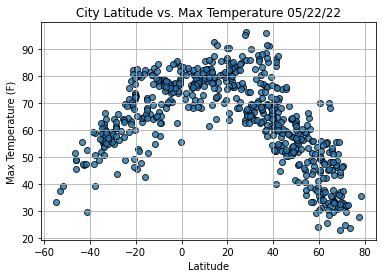

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

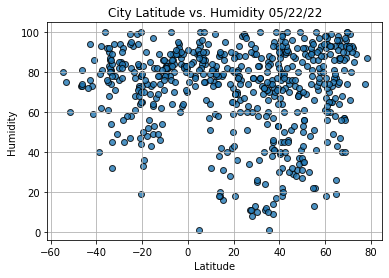

In [43]:
#change the y-axis variable for each weather parameter.
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

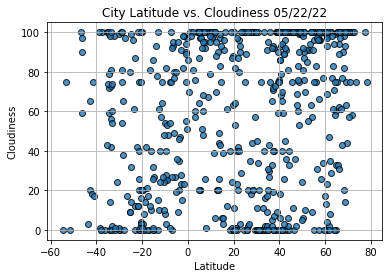

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

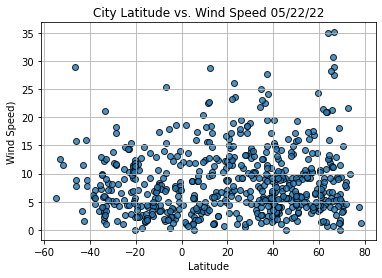

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig.png")

# Show plot.
plt.show()